# LG Washing Machine Dataset

## 목적: 세탁기에서 생성된 Log Data를 분석해보자.

---

## 데이터 셋 정보 (Metadata)

- **washer.csv**: 세탁기에서 생성된 Log 데이터
- **metadata.csv**: washer.csv의 각 컬럼 내용에 대한 설명

---

# 0. 작업 환경 설정하기

In [2]:
import numpy as np  # 수학 관련 라이브러리
import pandas as pd  # 데이터 입출력 및 처리 관련 라이브러리

import matplotlib.pyplot as plt # 데이터 시각화를 Python 라이브러리
import seaborn as sns  # 데이터 시각화를 Python 라이브러리

from IPython.display import Image # 주피터 노트북에 이미지 삽입을 위한 라이브러리

# matplotlib로 만들어지는 차트를 라인안에 넣는 명령어
%matplotlib inline 

# 화면에 보이는 테이블 정보량 설정
pd.set_option('max_rows', 30)  # row
pd.set_option('max_columns', 15)  # column

# 시각화 스타일 설정
# plt.style.use('fivethirtyeight') 
# sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.grid'] = True

# 1. 데이터 탐색

## 1.0 CSV 파일을 직접 보자

## 1.1 CSV 파일 읽어오기

In [3]:
path = 'data/washing_machine/'
df = pd.read_csv(path + 'washer.csv')

In [4]:
df

,category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,...,TurboShot,InitialBit,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,...,0,0,30,63,2,21,1
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,...,0,0,40,63,3,21,0
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,...,0,0,40,63,3,21,0
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,...,0,0,60,63,3,21,5
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,...,0,0,30,63,3,21,0
5,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,...,0,0,30,63,3,21,0
6,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_WASH_BEGIN,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,...,0,0,60,63,3,21,5
7,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_STATE,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,...,0,0,60,63,3,21,5
8,201,LG_WM_KR,KR,16/11/2017 3:26,A1,WM_STATE,MgAeADkBAAAAAAAHAAAABAAA5ig/AxUF,...,0,0,40,63,3,21,5
9,201,LG_WM_KR,KR,16/11/2017 3:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAADgTI/AxUA,...,0,0,50,63,3,21,0


## 1.2 데이터 살펴보기

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
category_code     500 non-null int64
model_name        500 non-null object
regist_country    500 non-null object
create_dt_utc     500 non-null object
device_id         500 non-null object
event_type        500 non-null object
mon_data          500 non-null object
State             500 non-null int64
Remain_Time_H     500 non-null int64
Remain_Time_M     500 non-null int64
Initial_Time_H    500 non-null int64
Initial_Time_M    500 non-null int64
APCourse          500 non-null int64
Error             500 non-null int64
SoilLevel         500 non-null int64
SpinSpeed         500 non-null int64
WaterTemp         500 non-null int64
RinseCount        500 non-null int64
DryLevel          500 non-null int64
Reserve_Time_H    500 non-null int64
Reserve_Time_M    500 non-null int64
FreshCare         500 non-null int64
ChildLock         500 non-null int64
Steam             500 non-null int64
R

In [60]:
df.shape

(500, 32)

In [61]:
df.head()

,category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,...,TurboShot,InitialBit,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,...,0,0,30,63,2,21,1
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,...,0,0,40,63,3,21,0
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,...,0,0,40,63,3,21,0
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,...,0,0,60,63,3,21,5
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,...,0,0,30,63,3,21,0


In [5]:
df.columns

Index(['category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'FreshCare',
       'ChildLock', 'Steam', 'RemoteStart', 'TurboShot', 'InitialBit',
       'PreState', 'SmartCourse', 'TCLCount', 'OPCourse', 'LoadLevel'],
      dtype='object')

> **Q. metadata.csv 를 읽어보자.**

In [6]:
# 여기에 작성해보세요.


> **Q. 읽어온 metadata 데이터 프레임의 크기를 어떻게 되는지 살펴보자**

In [7]:
# 여기에 해보세요.


## 1.3 임의 데이터 생성

> 분석을 위한 임의 변수들을 기존 데이터 프레임에 추가해보자.
>
> 1. 세제량
2. 세탁기 소음

In [8]:
detergent = np.random.randint(1, 6, size=len(df))  # 세제량은 1~5 구간에서 임의 생성
noise_level = np.random.randint(40, 71, size=len(df))  # 소음은 40~70 구간에서 임의 생성

In [9]:
new_data = {'Detergent': detergent, 'NoiseLevel': noise_level}

In [10]:
new_df = pd.DataFrame(data=new_data)
new_df.head(10)

,Detergent,NoiseLevel
0,1,69
1,1,52
2,1,45
3,3,45
4,4,63
5,3,46
6,1,48
7,1,64
8,5,44
9,1,52


## 1.4 DataFrame 결합

- 기존 데이터 프레임(df)과 새로 생성한 데이터 프레임(new_df)을 합쳐보자.

In [11]:
df = pd.concat([df, new_df], axis=1)
df

,category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,...,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel,Detergent,NoiseLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,...,30,63,2,21,1,1,69
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,...,40,63,3,21,0,1,52
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,...,40,63,3,21,0,1,45
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,...,60,63,3,21,5,3,45
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,...,30,63,3,21,0,4,63
5,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,...,30,63,3,21,0,3,46
6,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_WASH_BEGIN,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,...,60,63,3,21,5,1,48
7,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_STATE,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,...,60,63,3,21,5,1,64
8,201,LG_WM_KR,KR,16/11/2017 3:26,A1,WM_STATE,MgAeADkBAAAAAAAHAAAABAAA5ig/AxUF,...,40,63,3,21,5,5,44
9,201,LG_WM_KR,KR,16/11/2017 3:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAADgTI/AxUA,...,50,63,3,21,0,1,52


In [12]:
df.columns

Index(['category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'FreshCare',
       'ChildLock', 'Steam', 'RemoteStart', 'TurboShot', 'InitialBit',
       'PreState', 'SmartCourse', 'TCLCount', 'OPCourse', 'LoadLevel',
       'Detergent', 'NoiseLevel'],
      dtype='object')

In [13]:
df.shape

(500, 34)

## 1.4 컬럼 삭제

In [14]:
df = df.drop(['category_code', 'model_name', 'regist_country'], axis=1)

In [15]:
df.shape

(500, 31)

In [16]:
df.columns

Index(['create_dt_utc', 'device_id', 'event_type', 'mon_data', 'State',
       'Remain_Time_H', 'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M',
       'APCourse', 'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp',
       'RinseCount', 'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M',
       'FreshCare', 'ChildLock', 'Steam', 'RemoteStart', 'TurboShot',
       'InitialBit', 'PreState', 'SmartCourse', 'TCLCount', 'OPCourse',
       'LoadLevel', 'Detergent', 'NoiseLevel'],
      dtype='object')

> **Q. 'FreshCare', 'TurboShot', 'initialBit' 컬럼을 데이터 프레임에서 제거하고 실제 제대로 제거가 됐는지 컬럼/크기 등을 살펴보자.**

In [17]:
# 여기에 작성해보세요.


---

## 1.5 Grouping

- 지금까지 데이터를 새로 생성하고 필요없는 컬럼은 삭제하는 등의 전처리를 진행했습니다.
- 이번에는 **로그가 발생한 유형**이 어떤 것들이 있는지 살펴보겠습니다.

In [18]:
df['event_type']

0            WM_STATE
1            WM_STATE
2         WM_WASH_END
3      COMMON_WIFI_ON
4            WM_STATE
5         WM_WASH_END
6       WM_WASH_BEGIN
7            WM_STATE
8            WM_STATE
9            WM_STATE
10        WM_WASH_END
11     COMMON_WIFI_ON
12           WM_STATE
13           WM_STATE
14           WM_STATE
            ...      
485       WM_WASH_END
486    COMMON_WIFI_ON
487          WM_STATE
488          WM_STATE
489          WM_STATE
490          WM_STATE
491       WM_WASH_END
492    COMMON_WIFI_ON
493     WM_WASH_BEGIN
494          WM_STATE
495          WM_STATE
496          WM_STATE
497          WM_STATE
498          WM_STATE
499       WM_WASH_END
Name: event_type, Length: 500, dtype: object

In [19]:
df['event_type'].unique()

array(['WM_STATE', 'WM_WASH_END', 'COMMON_WIFI_ON', 'WM_WASH_BEGIN',
       'WM_PAUSE', 'WM_CONTINUE', 'WM_ERROR'], dtype=object)

In [20]:
df['event_type'].value_counts()

WM_STATE          294
COMMON_WIFI_ON     65
WM_WASH_END        64
WM_WASH_BEGIN      40
WM_PAUSE           23
WM_CONTINUE        11
WM_ERROR            3
Name: event_type, dtype: int64

## 1.6 탐색: 일시중지('WM_PAUSE') Log가 가장 많은 기계의 device_id를 찾아보자. (필터링)

In [21]:
df[df['event_type'] == 'WM_PAUSE']

,create_dt_utc,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,...,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel,Detergent,NoiseLevel
61,19/11/2017 4:28,A1,WM_PAUSE,BgEAAQANAAICAwQAAAAAAAAAABQ/BxUA,6,1,0,...,20,63,7,21,0,2,49
94,20/11/2017 5:43,A1,WM_PAUSE,BgAuADkBAAAEAAAHAAAABAAARig/CRUF,6,0,46,...,40,63,9,21,5,3,54
154,19/11/2017 4:35,A2,WM_PAUSE,BgAnACcBAAIEAwIAAAAAhAAAABQ9IQ4A,6,0,39,...,20,61,33,14,0,1,60
156,19/11/2017 4:37,A2,WM_PAUSE,BgA7ADsBAAIEAwMAAAAABAAAABQ9IQ4A,6,0,59,...,20,61,33,14,0,2,52
166,20/11/2017 3:49,A2,WM_PAUSE,BgAnACcBAAIEAwIAAAAAhAAAABc9Ig4B,6,0,39,...,23,61,34,14,1,2,57
169,20/11/2017 3:55,A2,WM_PAUSE,BgAhACcBAAIEAwIAAAAAhAAAXxc9Ig4B,6,0,33,...,23,61,34,14,1,4,57
172,20/11/2017 3:56,A2,WM_PAUSE,BgEwATABAAMDAwMAAAAAhAAAABc9Ig4F,6,1,48,...,23,61,34,14,5,2,59
175,20/11/2017 3:56,A2,WM_PAUSE,BgEmASYBAAIDAwMAAAAABAAAABc9Ig4F,6,1,38,...,23,61,34,14,5,2,47
177,20/11/2017 3:56,A2,WM_PAUSE,BgEmASYBAAICAwMAAAAAAAAAABc9Ig4F,6,1,38,...,23,61,34,14,5,4,50
208,16/11/2017 11:07,A3,WM_PAUSE,BgEQARgBAAIFAQQAAAAAhAAADBczJgcC,6,1,16,...,23,51,38,7,2,2,68


> df[조건식]

In [22]:
df[df['event_type'] == 'WM_PAUSE']['device_id']

61     A1
94     A1
154    A2
156    A2
166    A2
169    A2
172    A2
175    A2
177    A2
208    A3
218    A3
228    A3
239    A3
242    A3
252    A3
255    A3
257    A3
273    A3
283    A3
292    A3
295    A3
459    A5
480    A5
Name: device_id, dtype: object

> **Q. 일시중지인 device id를 Grouping 해서 개수를 세어보자**

In [23]:
# 여기에 작성해보세요.


> **Q. 어느 기계(device id)에 가장 많은 에러('WM_ERROR') Log가 기록되어 있을까?**

In [24]:
# 여기에 작성해보세요.


## 1.7 탐색: 어느 시간대에 Log가 많이 쌓였을까?

### - 그런데 시간 데이터가 이상하게 생겼다! 데이터 타입을 확인해보자.

In [25]:
df['create_dt_utc']

0       16/11/2017 0:22
1       16/11/2017 0:32
2       16/11/2017 0:32
3       16/11/2017 2:48
4       16/11/2017 2:57
5       16/11/2017 2:57
6       16/11/2017 2:58
7       16/11/2017 2:58
8       16/11/2017 3:26
9       16/11/2017 3:57
10      16/11/2017 3:57
11     16/11/2017 11:14
12     16/11/2017 11:15
13     16/11/2017 11:30
14     16/11/2017 12:08
             ...       
485    19/11/2017 10:16
486     20/11/2017 3:51
487     20/11/2017 3:52
488     20/11/2017 4:51
489     20/11/2017 5:23
490     20/11/2017 5:32
491     20/11/2017 5:32
492    20/11/2017 10:17
493    20/11/2017 10:17
494    20/11/2017 10:17
495    20/11/2017 10:18
496    20/11/2017 11:19
497    20/11/2017 11:56
498    20/11/2017 12:04
499    20/11/2017 12:04
Name: create_dt_utc, Length: 500, dtype: object

In [26]:
df['create_dt_utc'][0]

'16/11/2017 0:22'

In [27]:
type(df['create_dt_utc'][0])

str

### - String을 Datetime 형식으로 바꾸자.

In [28]:
df['create_dt_utc'] = pd.to_datetime(df['create_dt_utc'])

In [29]:
df['create_dt_utc']

0     2017-11-16 00:22:00
1     2017-11-16 00:32:00
2     2017-11-16 00:32:00
3     2017-11-16 02:48:00
4     2017-11-16 02:57:00
5     2017-11-16 02:57:00
6     2017-11-16 02:58:00
7     2017-11-16 02:58:00
8     2017-11-16 03:26:00
9     2017-11-16 03:57:00
10    2017-11-16 03:57:00
11    2017-11-16 11:14:00
12    2017-11-16 11:15:00
13    2017-11-16 11:30:00
14    2017-11-16 12:08:00
              ...        
485   2017-11-19 10:16:00
486   2017-11-20 03:51:00
487   2017-11-20 03:52:00
488   2017-11-20 04:51:00
489   2017-11-20 05:23:00
490   2017-11-20 05:32:00
491   2017-11-20 05:32:00
492   2017-11-20 10:17:00
493   2017-11-20 10:17:00
494   2017-11-20 10:17:00
495   2017-11-20 10:18:00
496   2017-11-20 11:19:00
497   2017-11-20 11:56:00
498   2017-11-20 12:04:00
499   2017-11-20 12:04:00
Name: create_dt_utc, Length: 500, dtype: datetime64[ns]

In [30]:
df['create_dt_utc'][0]

Timestamp('2017-11-16 00:22:00')

In [31]:
type(df['create_dt_utc'][0])

pandas._libs.tslib.Timestamp

### - 이제 4시간 단위로 Grouping 해보자!

In [32]:
grouper = pd.Grouper(key='create_dt_utc', freq='14400s')

In [33]:
freq = df.groupby(grouper)

In [34]:
freq

In [35]:
freq['create_dt_utc']

> **groupby 명령어는 그 자체만으로는 아무것도 없어 보인다. 엑셀 피봇테이블과 똑같지 않은가?**

In [36]:
freq['event_type'].count()

create_dt_utc
2017-11-16 00:00:00    25
2017-11-16 04:00:00     7
2017-11-16 08:00:00    16
2017-11-16 12:00:00    31
2017-11-16 16:00:00     3
2017-11-16 20:00:00     8
2017-11-17 00:00:00    16
2017-11-17 04:00:00    14
2017-11-17 08:00:00    34
2017-11-17 12:00:00     7
2017-11-17 16:00:00     0
2017-11-17 20:00:00     0
2017-11-18 00:00:00    35
2017-11-18 04:00:00    16
2017-11-18 08:00:00    24
2017-11-18 12:00:00    26
2017-11-18 16:00:00     0
2017-11-18 20:00:00    15
2017-11-19 00:00:00    29
2017-11-19 04:00:00    39
2017-11-19 08:00:00    33
2017-11-19 12:00:00    19
2017-11-19 16:00:00     0
2017-11-19 20:00:00     4
2017-11-20 00:00:00    39
2017-11-20 04:00:00    23
2017-11-20 08:00:00    26
2017-11-20 12:00:00     7
2017-11-20 16:00:00     0
2017-11-20 20:00:00     4
Freq: 14400S, Name: event_type, dtype: int64

In [37]:
freq['create_dt_utc'].count()

create_dt_utc
2017-11-16 00:00:00    25
2017-11-16 04:00:00     7
2017-11-16 08:00:00    16
2017-11-16 12:00:00    31
2017-11-16 16:00:00     3
2017-11-16 20:00:00     8
2017-11-17 00:00:00    16
2017-11-17 04:00:00    14
2017-11-17 08:00:00    34
2017-11-17 12:00:00     7
2017-11-17 16:00:00     0
2017-11-17 20:00:00     0
2017-11-18 00:00:00    35
2017-11-18 04:00:00    16
2017-11-18 08:00:00    24
2017-11-18 12:00:00    26
2017-11-18 16:00:00     0
2017-11-18 20:00:00    15
2017-11-19 00:00:00    29
2017-11-19 04:00:00    39
2017-11-19 08:00:00    33
2017-11-19 12:00:00    19
2017-11-19 16:00:00     0
2017-11-19 20:00:00     4
2017-11-20 00:00:00    39
2017-11-20 04:00:00    23
2017-11-20 08:00:00    26
2017-11-20 12:00:00     7
2017-11-20 16:00:00     0
2017-11-20 20:00:00     4
Freq: 14400S, Name: create_dt_utc, dtype: int64

In [38]:
freq.count()

,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,Initial_Time_H,...,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel,Detergent,NoiseLevel
create_dt_utc,,,,,,,,,,,,,,,
2017-11-16 00:00:00,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25
2017-11-16 04:00:00,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7
2017-11-16 08:00:00,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16
2017-11-16 12:00:00,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31
2017-11-16 16:00:00,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3
2017-11-16 20:00:00,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8
2017-11-17 00:00:00,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16
2017-11-17 04:00:00,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14
2017-11-17 08:00:00,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34


In [39]:
freq = freq['create_dt_utc'].count()

In [40]:
freq

create_dt_utc
2017-11-16 00:00:00    25
2017-11-16 04:00:00     7
2017-11-16 08:00:00    16
2017-11-16 12:00:00    31
2017-11-16 16:00:00     3
2017-11-16 20:00:00     8
2017-11-17 00:00:00    16
2017-11-17 04:00:00    14
2017-11-17 08:00:00    34
2017-11-17 12:00:00     7
2017-11-17 16:00:00     0
2017-11-17 20:00:00     0
2017-11-18 00:00:00    35
2017-11-18 04:00:00    16
2017-11-18 08:00:00    24
2017-11-18 12:00:00    26
2017-11-18 16:00:00     0
2017-11-18 20:00:00    15
2017-11-19 00:00:00    29
2017-11-19 04:00:00    39
2017-11-19 08:00:00    33
2017-11-19 12:00:00    19
2017-11-19 16:00:00     0
2017-11-19 20:00:00     4
2017-11-20 00:00:00    39
2017-11-20 04:00:00    23
2017-11-20 08:00:00    26
2017-11-20 12:00:00     7
2017-11-20 16:00:00     0
2017-11-20 20:00:00     4
Freq: 14400S, Name: create_dt_utc, dtype: int64

In [41]:
type(freq)

pandas.core.series.Series

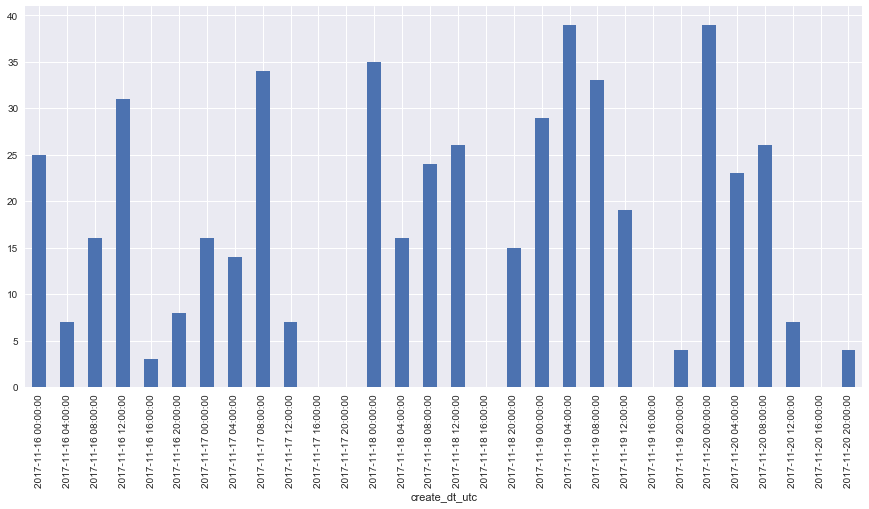

In [42]:
freq.plot(kind='bar', figsize=(15, 7))

> 새벽 시간대에 Log 기록이 왜 많은 걸까?
>
> 이상하다. 너무 새벽 시간대이다.
>
> 혹시 데이터가 이상한 건 아닌지 의심할 필요가 있을 것 같다.
>
> 그런데 지금까지 그냥 지나쳤는데 시간이 UTC로 되어있어서 그런건 아닐까?
>
> UTC: 협정세계시

In [43]:
import time

In [44]:
time.timezone  # 컴퓨터에 설정된 타임존과 UTC의 차이 (단위: 초) (UTC - Current Timezone)

-32400

In [45]:
from datetime import timedelta

In [46]:
timedelta(seconds=32400)

datetime.timedelta(0, 32400)

In [47]:
df['create_dt_utc'] + timedelta(seconds=32400)

0     2017-11-16 09:22:00
1     2017-11-16 09:32:00
2     2017-11-16 09:32:00
3     2017-11-16 11:48:00
4     2017-11-16 11:57:00
5     2017-11-16 11:57:00
6     2017-11-16 11:58:00
7     2017-11-16 11:58:00
8     2017-11-16 12:26:00
9     2017-11-16 12:57:00
10    2017-11-16 12:57:00
11    2017-11-16 20:14:00
12    2017-11-16 20:15:00
13    2017-11-16 20:30:00
14    2017-11-16 21:08:00
              ...        
485   2017-11-19 19:16:00
486   2017-11-20 12:51:00
487   2017-11-20 12:52:00
488   2017-11-20 13:51:00
489   2017-11-20 14:23:00
490   2017-11-20 14:32:00
491   2017-11-20 14:32:00
492   2017-11-20 19:17:00
493   2017-11-20 19:17:00
494   2017-11-20 19:17:00
495   2017-11-20 19:18:00
496   2017-11-20 20:19:00
497   2017-11-20 20:56:00
498   2017-11-20 21:04:00
499   2017-11-20 21:04:00
Name: create_dt_utc, Length: 500, dtype: datetime64[ns]

> **Q. 한국 시각으로 변경한 데이터를 create_dt_kst 라는 새로운 컬럼에 넣어보자**

In [48]:
# 여기에 직접 작성해보세요.


> **Q. 한국 시각으로 변경된 데이터를 가지고 그래프를 그려보자.**

In [49]:
# 여기에 직접 작성해보세요.
